#코로나-19 확산 전후로 달라진 여름철 서울 지하철 승하차 양상

## 송상록

# 1. 분석 문제

## 코로나-19

2019년 말 중국 우한시에서 발생한 코로나바이러스감염증-19는 2020년 전 세계로 확산하면서 심각한 범유행이 되었다. 대한민국 역시 2020년 2월의 신천지 대구교회, 8월의 광화문 집회 등 집단감염으로 인해 확진자가 빠르게 증가하고 있고, 2020년 9월 현재 총 확진자는 23,812명에 달한다. 전염력이 매우 높은 바이러스인 만큼, 코로나-19는 대한민국 국민의 일상생활을 크게 바꾸어 놓고 있다. 사람들이 한자리에 많이 모이는 것을 막기 위한 정부의 사회적 거리 두기 정책에 따라 재택근무, 비대면 수업, 무관중 스포츠 경기, 유흥업소 운영 제한 등 많은 변화가 생겼다. 휴일에 자발적으로 외출을 하지 않고 집에서 휴식을 취하는 사람들도 많아졌다. 사람들이 코로나-19 확산 이전보다 외출 및 이동을 자제하는 만큼, 대중교통 이용 패턴에도 변화가 생겼으리라 본다. 그러므로 본 보고서에서는 서울시민의 제일 핵심적인 교통수단인 지하철(전철)의 이용 양상이 코로나-19 확산 이전과 이후로 어떻게 바뀌었는지를 분석해 보고자 한다.

## 데이터 출처

본 분석에서는 **티머니 홈페이지에서 제공된 월간 교통카드 통계자료**(https://www.t-money.co.kr/ncs/pct/ugd/ReadTrcrStstDtl.dev?useYm=201912&rgtDtm=20200103123845) 및 **서울 열린데이터광장에서 제공된 역별 승하차 인원 정보**(https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do) 를 활용하였다. 전자는 월별로 각 지하철역의 승하차 승객 수를 확인할 수 있고, 후자는 일별로 확인할 수 있다. 본인은 월별 분석을 의도했기에 전자의 데이터파일을 주되게 활용했다. 후자의 경우 전자에서 일부 잘못 표기한 역 번호를 구분하기 위해 참고만 하였다. 시기로는 코로나19 확산 이전과 이후인 2019년 및 2020년, 그리고 보통 사람들의 이동량이 많은 편인 여름 휴가철인 7월 및 8월을 선택했다.

## 분석 방법

핵심 질문은 **'여름철 코로나19로 인해 타격을 제일 크게 받은 역/노선은 어디일까?'** 이다. 코로나-19 확산 이전인 2019년 7, 8월의 데이터와 확산 직후인 2020년 7, 8월의 데이터를 비교하여 서울시민의 지하철 이용 양상 변화를 확인하고자 했다. 우선 역별로 코로나19 확산 이후 승하차 승객 수 증감률을 계산하여, 제일 승객이 많이 감소한 곳이 어디인지를 확인해 보겠다. 다음으로는 이를 노선별로 확장하여 제일 타격을 크게 받은 노선을 살펴보고자 한다.

# 2. 데이터 클리닝

## 패키지 불러오기 및 드라이브 마운트

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 불러오기

홈페이지상에서는 데이터가 .xls 파일로 제공되었으나, 불러오기의 편의를 위해 엑셀을 통해 미리 .csv 파일로 변화시킨 후 데이터를 불러왔다.

In [ ]:
df_julMetro19 = pd.read_csv('/content/julMetro19.csv', encoding='euc-kr')
df_augMetro19 = pd.read_csv('/content/augMetro19.csv', encoding='euc-kr')
df_julMetro20 = pd.read_csv('/content/julMetro20.csv', encoding='euc-kr')
df_augMetro20 = pd.read_csv('/content/augMetro20.csv', encoding='euc-kr')

df_julMetro19.head() # 확인용

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2019-07,1호선,150,서울역,"1,735,553","1,647,353",2019-08-03 11:47:06
1,2019-07,1호선,151,시청,"779,372","798,955",2019-08-03 11:47:06
2,2019-07,1호선,152,종각,"1,371,717","1,335,308",2019-08-03 11:47:06
3,2019-07,1호선,153,종로3가,"1,065,085","1,011,157",2019-08-03 11:47:06
4,2019-07,1호선,154,종로5가,"803,024","806,655",2019-08-03 11:47:06


## 연도별 데이터프레임 생성

각 연도별로 따로 존재하는 7월 및 8월 데이터프레임을
호선명 및 지하철역 기준으로 하나의 데이터프레임으로 결합시켰다.
이후 중복되거나 분석에 필요없는 열을 제거하였다.
(역 id는 데이터별로 달라지는 경우가 있어 활용하지 않았다.)

In [ ]:
df_metro19 = pd.merge(df_julMetro19, df_augMetro19, on=['호선명', '지하철역'], how='inner')
df_metro19 = df_metro19.loc[:, ['호선명', '지하철역', '승차승객수_x', '하차승객수_x', '승차승객수_y', '하차승객수_y']]
df_metro19.head()

,호선명,지하철역,승차승객수_x,하차승객수_x,승차승객수_y,하차승객수_y
0,1호선,서울역,"1,735,553","1,647,353","1,728,791","1,641,039"
1,1호선,시청,"779,372","798,955","785,546","802,270"
2,1호선,종각,"1,371,717","1,335,308","1,329,456","1,288,544"
3,1호선,종로3가,"1,065,085","1,011,157","1,012,667","960,538"
4,1호선,종로5가,"803,024","806,655","781,398","783,403"


In [ ]:
df_metro20 = pd.merge(df_julMetro20, df_augMetro20, on=['호선명', '지하철역'], how='inner')
df_metro20 = df_metro20.loc[:, ['호선명', '지하철역', '승차승객수_x', '하차승객수_x', '승차승객수_y', '하차승객수_y']]
df_metro20.head()

,호선명,지하철역,승차승객수_x,하차승객수_x,승차승객수_y,하차승객수_y
0,1호선,서울역,"1,220,928","1,169,359","1,011,129","965,101"
1,1호선,동묘앞,"258,270","270,340","204,746","211,216"
2,1호선,시청,"559,110","573,826","459,177","459,382"
3,1호선,종각,"1,042,573","1,025,498","818,654","801,346"
4,1호선,종로3가,"779,321","733,402","617,564","582,316"


In [ ]:
df_metro19 = df_metro19.dropna()
df_metro20 = df_metro20.dropna()

## 연도별 7,8월 이용객 수 계산

숫자 연산을 위해 승차 및 하차 승객수 열 데이터의 type을 문자열에서 정수로 변경하였다. 이 과정에서 모든 콤마를 삭제하였다. 각 연도별로 7, 8월 승/하차객을 모두 더해 전체 이용객 수를 계산하였다.

In [ ]:
df_metro19 = df_metro19.replace(',','', regex=True)
df_metro19[['승차승객수_x', '하차승객수_x', '승차승객수_y', '하차승객수_y']] = df_metro19[['승차승객수_x', '하차승객수_x', '승차승객수_y', '하차승객수_y']].apply(pd.to_numeric)
df_metro19['총승객수'] = df_metro19.sum(axis = 1)
df_metro19.head()

,호선명,지하철역,승차승객수_x,하차승객수_x,승차승객수_y,하차승객수_y,총승객수
0,1호선,서울역,1735553,1647353,1728791,1641039,6752736
1,1호선,시청,779372,798955,785546,802270,3166143
2,1호선,종각,1371717,1335308,1329456,1288544,5325025
3,1호선,종로3가,1065085,1011157,1012667,960538,4049447
4,1호선,종로5가,803024,806655,781398,783403,3174480


In [ ]:
df_metro20 = df_metro20.replace(',','', regex=True)
df_metro20[['승차승객수_x', '하차승객수_x', '승차승객수_y', '하차승객수_y']] = df_metro20[['승차승객수_x', '하차승객수_x', '승차승객수_y', '하차승객수_y']].apply(pd.to_numeric)
df_metro20['총승객수'] = df_metro20.sum(axis = 1)
df_metro20.head()

,호선명,지하철역,승차승객수_x,하차승객수_x,승차승객수_y,하차승객수_y,총승객수
0,1호선,서울역,1220928,1169359,1011129,965101,4366517
1,1호선,동묘앞,258270,270340,204746,211216,944572
2,1호선,시청,559110,573826,459177,459382,2051495
3,1호선,종각,1042573,1025498,818654,801346,3688071
4,1호선,종로3가,779321,733402,617564,582316,2712603


이후 분석에 필요한 총 승객수 열만 남겨두었다.

In [ ]:
df_metro19 = df_metro19.loc[:, ['호선명', '지하철역', '총승객수']]
df_metro20 = df_metro20.loc[:, ['호선명', '지하철역', '총승객수']]
df_metro19.head()

,호선명,지하철역,총승객수
0,1호선,서울역,6752736
1,1호선,시청,3166143
2,1호선,종각,5325025
3,1호선,종로3가,4049447
4,1호선,종로5가,3174480


## 연도 비교 데이터프레임 생성

2019년 및 2020년 데이터프레임을 하나로 결합하였다. 결측치를 확인한 결과, 일부 역의 경우 부역명이 새로 생겨 결합이 제대로 안 되기도 했다. 이에 따라 '동대문역사문화공원', '낙성대', '마곡나루', '용마산' 역은 지하철역 이름을 직접 수정하였다. 또한 '임진강'은 2020년에 새로 개통한 역이라서 삭제하였다. '지축', '검암', '신내'가 삭제된 이유는 이후 '이용 승객이 매우 저조한 역 제거' 문단을 참고 바란다.

In [ ]:
df_metro = pd.merge(df_metro19, df_metro20, on=['호선명', '지하철역'], how='outer')

is_NaN = df_metro.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_metro[row_has_NaN]

print(rows_with_NaN)

          호선명            지하철역     총승객수_x     총승객수_y
14        2호선       동대문역사문화공원  2480503.0        NaN
36        2호선             낙성대  3557569.0        NaN
107       4호선       동대문역사문화공원  2672188.0        NaN
266       일산선              지축        2.0        NaN
335       경의선              검암        4.0        NaN
..        ...             ...        ...        ...
605       5호선  동대문역사문화공원(DDP)        NaN   279214.0
606       6호선              신내        NaN       16.0
607       7호선     용마산(용마폭포공원)        NaN   605001.0
608       9호선     마곡나루(서울식물원)        NaN  1049236.0
609  공항철도 1호선     마곡나루(서울식물원)        NaN   679459.0

[18 rows x 4 columns]


In [ ]:
df_metro19.loc[df_metro19['지하철역'] == '동대문역사문화공원', ['지하철역']] = '동대문역사문화공원(DDP)'
df_metro19.loc[df_metro19['지하철역'] == '낙성대', ['지하철역']] = '낙성대(강감찬)'
df_metro19.loc[df_metro19['지하철역'] == '용마산', ['지하철역']] = '용마산(용마폭포공원)'
df_metro19.loc[df_metro19['지하철역'] == '마곡나루', ['지하철역']] = '마곡나루(서울식물원)'

In [ ]:
df_metro = pd.merge(df_metro19, df_metro20, on=['호선명', '지하철역'])
df_metro[df_metro['지하철역'] == '낙성대(강감찬)'] # 잘 결합되었는지 확인

,호선명,지하철역,총승객수_x,총승객수_y
36,2호선,낙성대(강감찬),3557569,2846130


## 중복행 제거

본 데이터프레임에는 호선과 역 이름이 같아 구분하기 어려운 경우가 있다. 여러 데이터프레임을 결합하면서 의도치 않게 착오가 생겼을 수도 있다. 그렇기에 중복행을 확인한 후 모두 제거하였다.

In [ ]:
print(df_metro[df_metro.duplicated(['호선명', '지하철역'], keep=False)])
df_metro = df_metro.drop_duplicates(['호선명', '지하철역'])

     호선명  지하철역  총승객수_x  총승객수_y
302  경의선   서울역  528403  424610
303  경의선   서울역  270882  424610
304  경의선   서울역  257532  424610
305  경의선   서울역      11  424610
310  경의선  홍대입구  281729  196348
311  경의선  홍대입구  140485  196348
312  경의선  홍대입구  141247  196348
313  경의선  홍대입구       3  196348


## 이용 승객이 매우 저조한 역 제거

환승역의 경우 간혹가다 개찰구가 한 쪽 노선에만 설치되어 있어, 반대쪽 노선의 경우 역 근무자를 비롯한 극소수의 승하차만 집계하는 경우가 있다. 이러한 경우 보통 승하차 인원을 합해도 100명이 안 되는 만큼 분석에서 제거하였다. (앞서 제거된 6호선 신내역, 일산선 지축역, 경의선 검암역도 같은 이유로 제거되었다고 보면 된다. 신내역은 6호선과 경춘선의 환승역이지만 개찰구가 경춘선에만 존재한다.)

In [ ]:
print(df_metro[(df_metro['총승객수_x'] < 100) | (df_metro['총승객수_y'] < 100)])
df_metro = df_metro.drop(df_metro[(df_metro['총승객수_x'] < 100) | (df_metro['총승객수_y'] < 100)].index)

     호선명 지하철역  총승객수_x  총승객수_y
72   3호선  충무로     117      46
192  경원선   창동      34      23
237  분당선   복정      37      29
333  경의선   계양      23      10
432  6호선  연신내      38      41


## 증감율 계산

이후 최종적으로 증감율을 계산했다. 증감율 계산 공식은 아래와 같다.

```
증감율 = {(2020년 - 2019년) / 2019년} * 100
```

In [ ]:
df_metro['증감율'] = (df_metro['총승객수_y'] - df_metro['총승객수_x']) / df_metro['총승객수_x'] * 100
df_metro.head()

,호선명,지하철역,총승객수_x,총승객수_y,증감율
0,1호선,서울역,6752736,4366517,-35.337069
1,1호선,시청,3166143,2051495,-35.205232
2,1호선,종각,5325025,3688071,-30.740776
3,1호선,종로3가,4049447,2712603,-33.013002
4,1호선,종로5가,3174480,2272886,-28.401313


마지막으로 편의를 위해 증감율 순으로 데이터프레임을 재정렬했다.

In [ ]:
df_metro.sort_values(by=['증감율'], inplace=True)
df_metro.to_csv('df_metro_final.csv', encoding='euc-kr')

# 3. 분석과 시각화



## 한글 폰트 불러오기

In [ ]:
import matplotlib as mpl

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


## 전체적인 증감율 양상

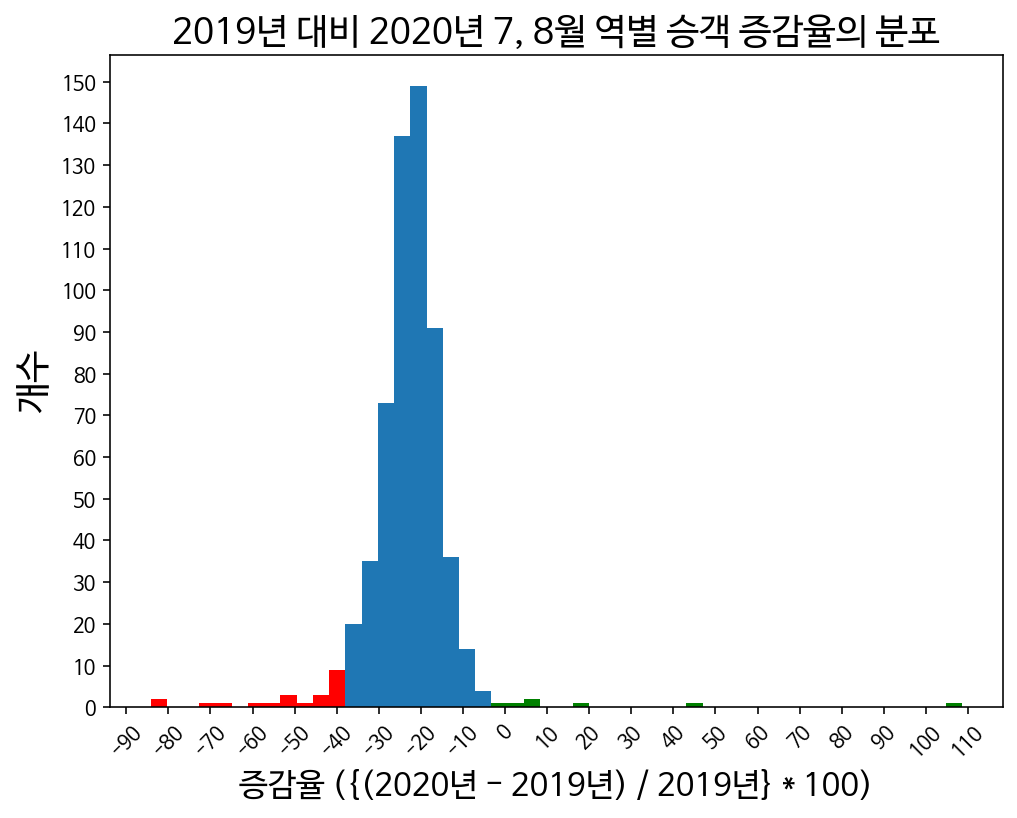

In [ ]:
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df_metro['증감율'], bins = 50)
for i in range(0, 12):
  patches[i].set_fc('r')
for i in range(21, 50):
  patches[i].set_fc('g')
plt.title('2019년 대비 2020년 7, 8월 역별 승객 증감율의 분포',  fontsize=18)
plt.xlabel('증감율 ({(2020년 - 2019년) / 2019년} * 100)', fontsize=16)
plt.ylabel('개수', fontsize=18)
plt.xticks(np.arange(-90, 120, step=10), fontsize=10, rotation=45)
plt.yticks(np.arange(0, 160, step=10), fontsize=10)
plt.show()

거의 모든 역의 승객이 감소하였고, 대부분의 역이 10%~40% 사이(파란색)의 감소율을 보였다. 코로나19 확산 이후 기존 지하철 막차 시간이 새벽 1시에서 자정으로 한 시간 앞당겨진 영향도 있고, 사회적 거리 두기 정책으로 인해 사람들의 지하철 이용이 줄었다고 볼 수도 있다. 40% 이상의 심각한 감소율을 보인 역도 있었고(빨간색), 승객이 증가한 역(초록색)도 역시 매우 적지만 존재는 했다.

## 승객이 제일 많이 줄어들은 역 15곳

위 히스토그램에서 빨간색으로 표시된, 40% 이상의 심각한 감소율을 보인 역 15곳을 막대그래프로 그려 보았다.

In [ ]:
top15 = df_metro[0:15].copy()
top15['지하철역'] = top15.호선명 + " " + top15.지하철역
top15

,호선명,지하철역,총승객수_x,총승객수_y,증감율
223,과천선,과천선 경마공원,840359,132593,-84.221862
570,공항철도 1호선,공항철도 1호선 인천공항1터미널,2222945,422286,-81.003309
571,공항철도 1호선,공항철도 1호선 인천공항2터미널,728786,199537,-72.620632
534,9호선,9호선 개화,699137,222573,-68.164609
109,4호선,4호선 명동,4600346,1819676,-60.444801
...,...,...,...,...,...
107,4호선,4호선 동대문역사문화공원(DDP),2672188,1460191,-45.355978
50,2호선,2호선 이대,2278678,1259478,-44.727689
48,2호선,2호선 홍대입구,10334314,5910023,-42.811656
583,9호선2~3단계,9호선2~3단계 올림픽공원(한국체대),1000109,582154,-41.790945


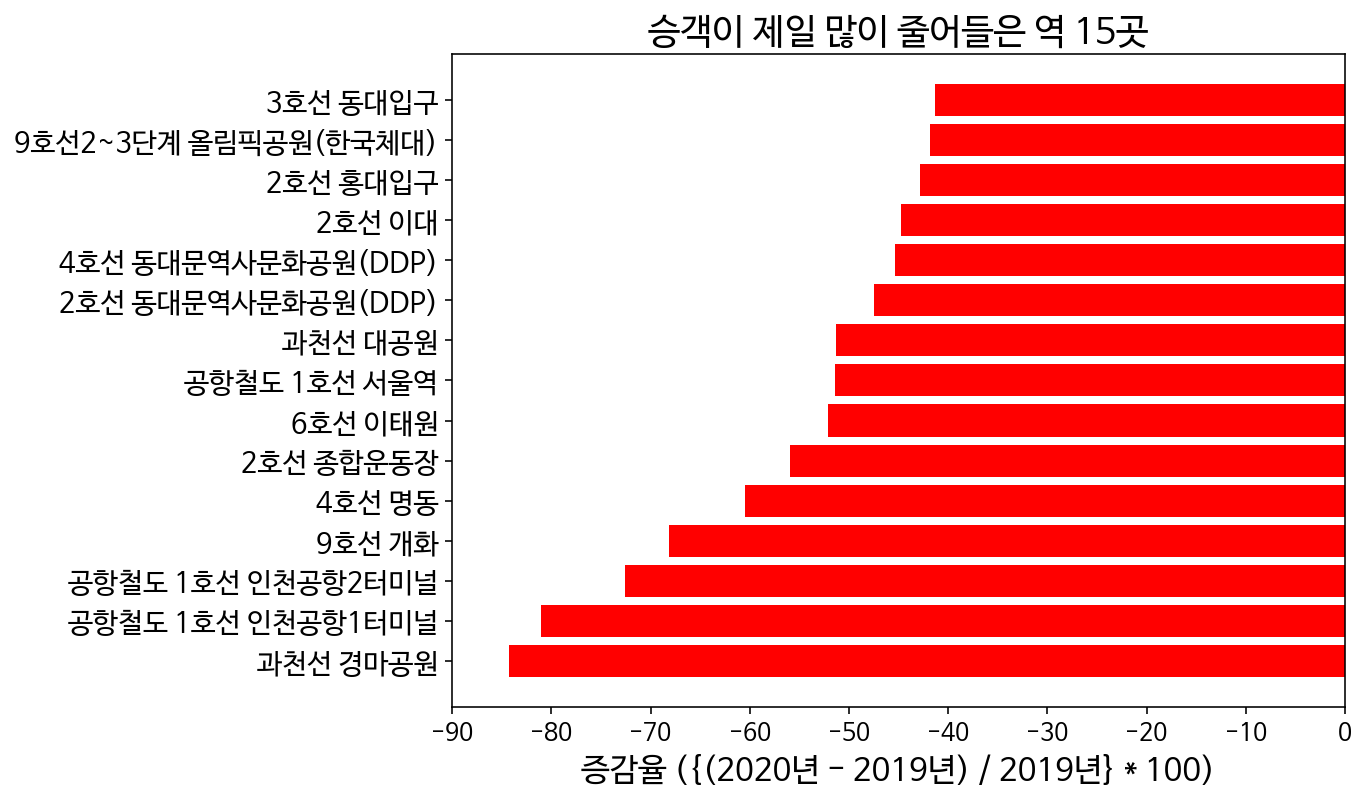

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(top15['지하철역'], top15['증감율'], color='r')
plt.title('승객이 제일 많이 줄어들은 역 15곳', fontsize=18)
plt.xlabel('증감율 ({(2020년 - 2019년) / 2019년} * 100)', fontsize=16)
plt.xticks(np.arange(-90, 10, step=10), fontsize=12)
plt.yticks(fontsize=14)
plt.show()

승객 감소율이 제일 높았던 역 세 곳은 경마공원역 및 인천공항1/2터미널역이였다. 경마공원은 코로나 때문에 경마를 자주 진행할 수 없기에, 인천공항터미널역은 해외여행을 가기 어려운 상황 때문에 크게 승객이 줄었다고 볼 수 있다. 서울의 명소 및 유흥가로 꼽히는 명동과 이태원, 홍대입구, 이대 등의 역도 승객이 많이 줄었다. 특히 이태원역은 이전 이태원 클럽에서 집단감염이 발생한 사건의 영향을 많이 받았을 것이다. 종합운동장역은 프로야구 무관중 및 제한 관중 경기의 영향을 크게 받았으며, 동대문역사문화공원이나 대공원 등 나들이 장소로 꼽히는 곳들도 승객이 많이 줄어들었다.

## 승객이 오히려 늘어난 역 6곳

In [ ]:
increase = df_metro[df_metro['증감율'] > 0].copy()
increase['지하철역'] = increase.호선명 + " " + increase.지하철역
increase

,호선명,지하철역,총승객수_x,총승객수_y,증감율
585,9호선2~3단계,9호선2~3단계 중앙보훈병원,894419,902366,0.888510
563,공항철도 1호선,공항철도 1호선 마곡나루(서울식물원),636093,679459,6.817557
381,5호선,5호선 마곡,766107,821913,7.284361
420,5호선,5호선 상일동,1402916,1669474,19.000282
334,경춘선,경춘선 신내,100077,146988,46.874906
60,3호선,3호선 지축,158459,330602,108.635672


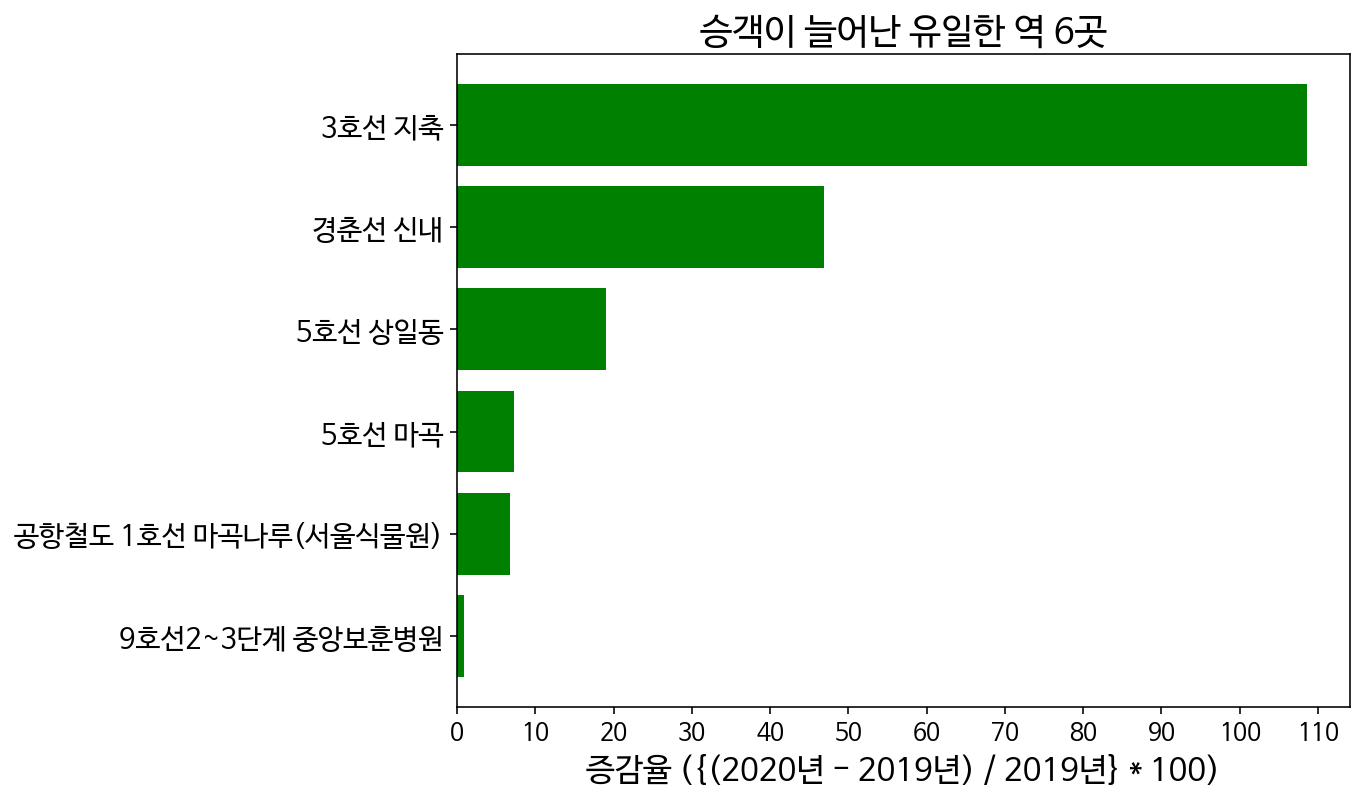

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(increase['지하철역'], increase['증감율'], color='g')
plt.title('승객이 늘어난 유일한 역 6곳', fontsize=18)
plt.xlabel('증감율 ({(2020년 - 2019년) / 2019년} * 100)', fontsize=16)
plt.xticks(np.arange(0, 120, step=10), fontsize=12)
plt.yticks(fontsize=14)
plt.show()

3호선 지축역은 코로나-19 확산에도 불구하고 작년보다 이용객이 무려 2배 이상 증가했다. 지축역 근처에 사는 과 동기에게 혹시 이유를 아냐고 질문했더니, 최근 지축역 근처 아파트값이 오르고 새로 생긴 아파트 단지가 있어서 승객이 많이 증가하고 있다고 답해 주었다. 경춘선 신내역의 경우 2020년에 개통한 6호선 신내역의 영향이 있을 것이다. (앞서 언급했듯이 6호선 신내역에는 개찰구가 없기 때문에, 6호선을 이용하더라도 경춘선 신내역에 탑승한 것으로 기록이 된다) 마지막으로 마곡나루역은 서울식물원 근처에 있는데, 서울식물원은 8월 말 사회적 거리 두기 2단계가 실행되기 전까지만 해도 휴장 없이 운영되어 왔다. 코로나 19에 지친 서울 시민들이 휴식하고자 식물원에 많이 찾은 것으로 추측해 볼 수 있다.

# 4. 노선별 증감율

## 노선 이름 통일시키기

마지막으로는 역별 승객 수를 노선별로 합산해, 어떤 노선이 코로나19로 인해 타격을 제일 크게 입었는지를 확인해 보겠다. 물론 위 데이터는 다른 노선으로 환승하는 경우를 포함하지 않았을 뿐만 아니라, 앞서 언급했듯이 환승역에 개찰구가 1개밖에 없는 경우 이를 반영하지 못한다. 그렇기에 정확한 노선별 승객 수를 알 수는 없다. 하지만 온라인상에 노선별 승객 수를 잘 나타내는 데이터가 없었기에, 어쩔 수 없이 노선 내에 속한 역의 승객 수를 단순히 합하는 방법으로 알아보겠다.

In [ ]:
df_metro.groupby(['호선명']).count().index

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선',
       '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype='object', name='호선명')

데이터에 존재하는 노선명을 모두 확인한 결과, 평소에 보지 못한 노선명을 몇 개 확인할 수 있다. 이는 노은 호선에 있는 역들도 행정상 다른 노선에 속하는 경우가 있기 때문이다. 이에 따라 노선 이름을 아래와 같이 통일시켰다.

**1호선**: 1호선 + 경부선 + 경인선 + 장항선 + 경원선  

**3호선**: 3호선 + 일산선  

**4호선**: 4호선 + 안산선 + 과천선

**9호선**: 9호선 + 9호선 2~3단계  

**경의중앙선**: 경의선 + 중앙선  

**2호선, 5호선, 6호선, 7호선, 8호선, 경강선, 경춘선, 공항철도 1호선, 분당선, 수인선, 우이신설선**: 그대로

(현재 분당선과 수인선은 수인분당선으로 통합되었지만, 데이터가 기록된 시점엔 별개의 노선이였기에 본 분석에서도 별개의 노선으로 간주한다.)



In [ ]:
df_metro.loc[(df_metro['호선명'] == '경부선') | (df_metro['호선명'] == '경인선') | (df_metro['호선명'] == '장항선') | (df_metro['호선명'] == '경원선'), ['호선명']] = '1호선'
df_metro.loc[df_metro['호선명'] == '일산선', ['호선명']] = '3호선'
df_metro.loc[(df_metro['호선명'] == '안산선') | (df_metro['호선명'] == '과천선'), ['호선명']] = '4호선'
df_metro.loc[df_metro['호선명'] == '9호선2~3단계', ['호선명']] = '9호선'
df_metro.loc[df_metro['호선명'] == '경의선', ['호선명']] = '경의중앙선'
df_metro.loc[df_metro['호선명'] == '중앙선', ['호선명']] = '경의중앙선'

df_metro.groupby(['호선명']).count().index

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의중앙선', '경춘선', '공항철도 1호선', '분당선', '수인선', '우이신설선'],
      dtype='object', name='호선명')

## 노선별 총승객수 합 구하기

In [ ]:
pre_group = df_metro['총승객수_x'].groupby(df_metro['호선명'])
df_pre = pre_group.sum().to_frame()

In [ ]:
post_group = df_metro['총승객수_y'].groupby(df_metro['호선명'])
df_post = post_group.sum().to_frame()

In [ ]:
df_lines = pd.merge(df_pre, df_post, on='호선명')
df_lines.head()

,총승객수_x,총승객수_y
호선명,,
1호선,155921724,114652631
2호선,189557782,138227209
3호선,82487037,61488295
4호선,97232132,69218134
5호선,73167941,58175526


## 노선별 증감율 구하기


In [ ]:
df_lines['증감율'] = (df_lines['총승객수_y'] - df_lines['총승객수_x']) / df_lines['총승객수_x'] * 100
df_lines.head()

,총승객수_x,총승객수_y,증감율
호선명,,,
1호선,155921724,114652631,-26.467828
2호선,189557782,138227209,-27.079117
3호선,82487037,61488295,-25.457021
4호선,97232132,69218134,-28.811461
5호선,73167941,58175526,-20.490415


In [ ]:
df_lines.sort_values(by=['증감율'], inplace=True)
df_lines

,총승객수_x,총승객수_y,증감율
호선명,,,
공항철도 1호선,14339092,8874095,-38.112574
4호선,97232132,69218134,-28.811461
2호선,189557782,138227209,-27.079117
1호선,155921724,114652631,-26.467828
3호선,82487037,61488295,-25.457021
...,...,...,...
8호선,22949461,18304021,-20.242044
7호선,84933687,67805310,-20.166765
9호선,44651356,35722257,-19.997375


## 막대 그래프: 호선별 감소율

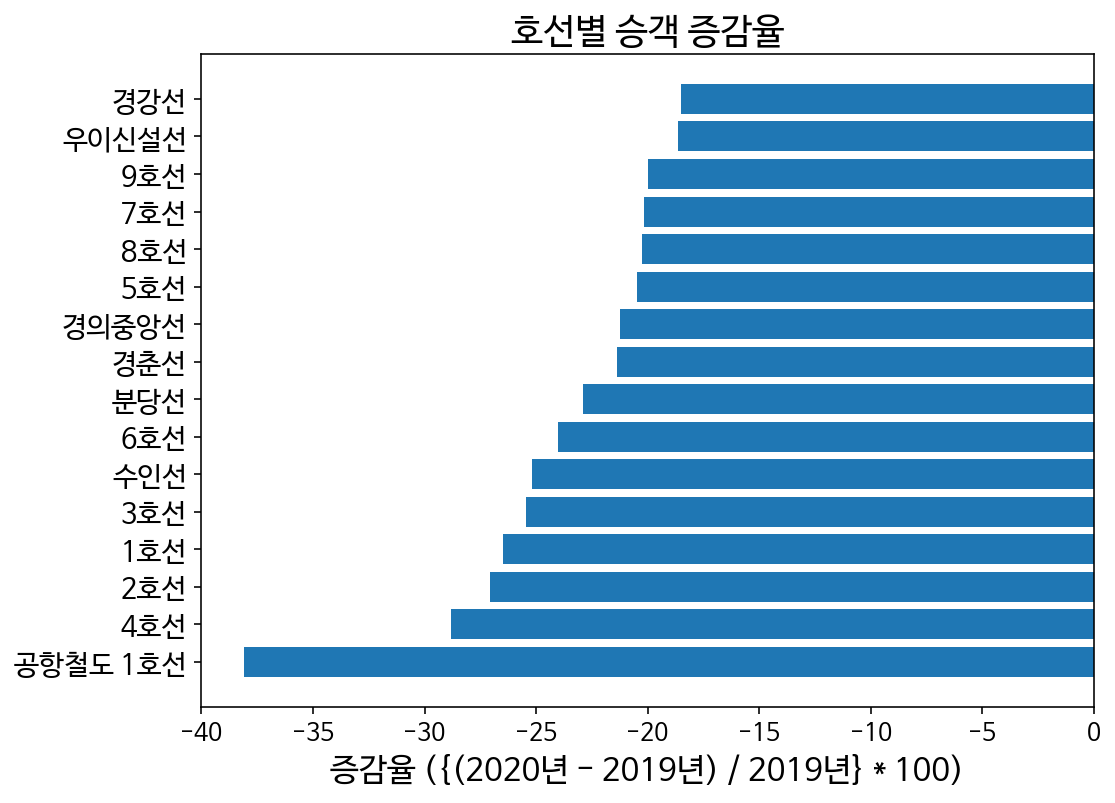

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(df_lines.index, df_lines['증감율'])
plt.title('호선별 승객 증감율', fontsize=18)
plt.xlabel('증감율 ({(2020년 - 2019년) / 2019년} * 100)', fontsize=16)
plt.xticks(np.arange(-40, 5, step=5), fontsize=12)
plt.yticks(fontsize=14)
plt.show()

미세하게 승객이 증가한 역이 몇 개라도 있었던 역별 증감율과는 다르게, 호선별로 확인한 결과 모든 노선의 승객이 감소했다. 그 중에서도 제일 감소율이 높은 노선은 공항철도였는데, 이는 앞서 인천공항제1터미널과 제2터미널역의 이용객이 현저히 낮아진 것과 비슷한 맥락으로 공항을 찾는 사람들이 줄었기 때문이라고 볼 수 있다. 두 번째로 승객이 많이 감소한 4호선은 관광 명소로 불리는 명동이나 혜화, 동대문역사문화공원 등 역을 많이 끼고 있어서 그만큼 승객이 줄은 것으로 보인다. 나머지 노선은 모두 비슷비슷한 감소율을 보인다.